#Tratamiento de imágenes
*autor: Paula Bonomini*
SIM 2022Q2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Instalar e importar librerías

!pip install SimpleITK

import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import cv2
from scipy import signal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52.8 MB 171 kB/s 


## Transformaciones de Intensidad 

uint8
[[27 26 26 26 27 33 43 48 51 60]
 [37 33 31 35 44 52 57 58 58 63]
 [50 47 47 55 61 62 60 54 51 60]
 [54 53 59 64 65 61 49 42 44 57]
 [57 61 64 65 62 51 39 39 44 54]
 [58 61 62 61 56 47 39 37 41 53]
 [53 58 59 57 53 50 42 35 38 48]
 [51 58 58 55 53 51 44 38 37 38]
 [49 55 55 51 52 51 50 41 33 33]
 [53 56 54 51 53 49 44 41 34 31]]
[[ 6  6  6  6  6  8 10 12 12 15]
 [ 9  8  7  8 11 13 14 14 14 15]
 [12 11 11 13 15 15 15 13 12 15]
 [13 13 14 16 16 15 12 10 11 14]
 [14 15 16 16 15 12  9  9 11 13]
 [14 15 15 15 14 11  9  9 10 13]
 [13 14 14 14 13 12 10  8  9 12]
 [12 14 14 13 13 12 11  9  9  9]
 [12 13 13 12 13 12 12 10  8  8]
 [13 14 13 12 13 12 11 10  8  7]]


Text(0.5, 1.0, 'Histograma Imagen2')

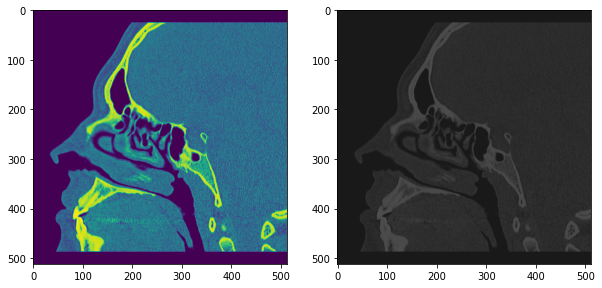

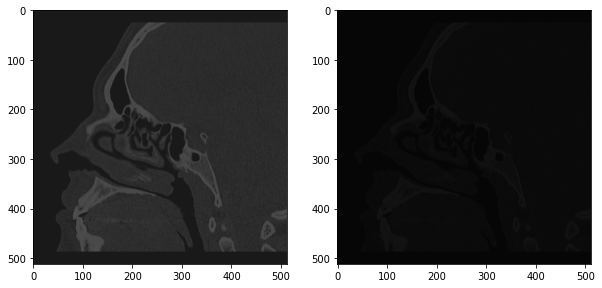

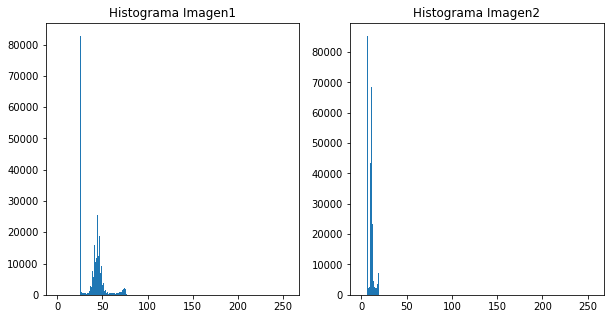

In [ ]:
imagen1 = cv2.imread('/content/drive/MyDrive/SIM2022Q2/señales/Imagenes/img25.png',0)
print(imagen1.dtype)

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(imagen1)
axs[1].imshow(imagen1, cmap="gray",vmin=0, vmax=255)

imagen2 = imagen1.copy() // 4
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(imagen1, cmap="gray",vmin=0, vmax=255)
axs[1].imshow(imagen2, cmap="gray",vmin=0, vmax=255)

plt.figure(figsize=(10,5))
print(imagen1[244:254,244:254])
print(imagen2[244:254,244:254])
plt.subplot(121)
plt.hist(np.ravel(imagen1), bins=256, range=(0,255));
plt.title('Histograma Imagen1')
plt.subplot(122)
plt.hist(np.ravel(imagen2), bins=256, range=(0,255));
plt.title('Histograma Imagen2')

### Umbralización

Text(0.5, 1.0, 'Histograma Imagen2')

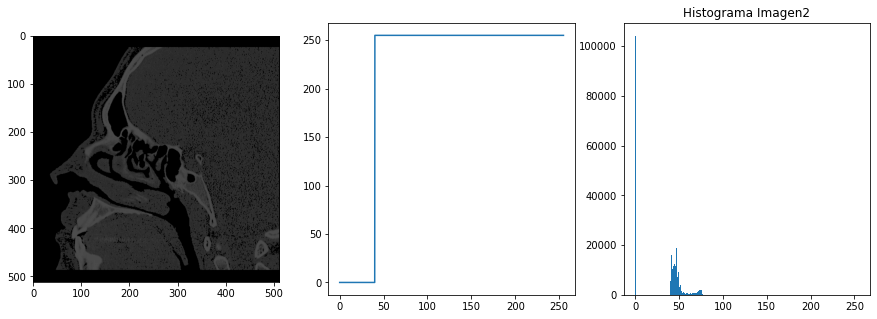

In [ ]:
umbral = 40
imagen2 = imagen1.copy()
imagen2[imagen2<umbral] = 0

# Grafico
fig, axs = plt.subplots(1,3, figsize = (15,5))

axs[0].imshow(imagen2, cmap="gray",vmin=0, vmax=255)
plt.title('Señal umbralizada')

x1 = np.arange(-umbral,255-umbral,0.1)
escalon = np.heaviside(x1,0.5)
axs[1].plot(x1+umbral,255*escalon)
plt.title('Transformación')

axs[2].hist(np.ravel(imagen2), bins=256, range=(0,255));
plt.title('Histograma Imagen2')

### Brillo: Qué pasa si le sumamos una constante a la imagen?

78


Text(0.5, 1.0, 'Histograma Imagen2')

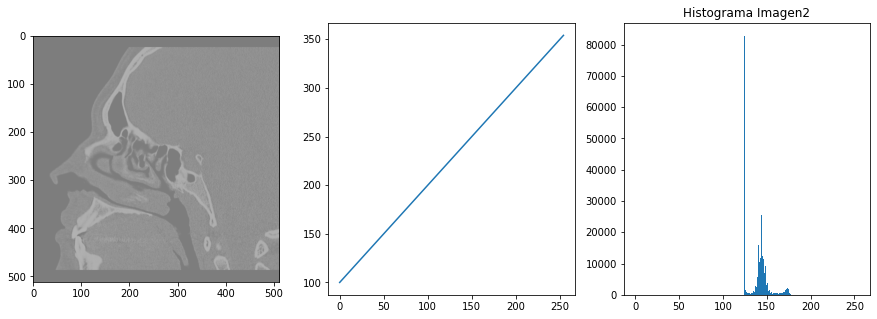

In [ ]:
print(np.amax(imagen1))
brillo = 100
imagen2 = imagen1.copy()+brillo

# Grafico
fig, axs = plt.subplots(1,3, figsize = (15,5))

axs[0].imshow(imagen2, cmap="gray",vmin=0, vmax=255)
plt.title('Imagen con brillo aumentado')
axs[1].plot(np.arange(255), np.arange(255)+brillo)
plt.title('Trasformación')

axs[2].hist(np.ravel(imagen2), bins=256, range=(0,255));
plt.title('Histograma Imagen2')

### Contraste: Puedo cambiar el contraste de la imagen1?

Text(0.5, 1.0, 'Histograma Imagen2')

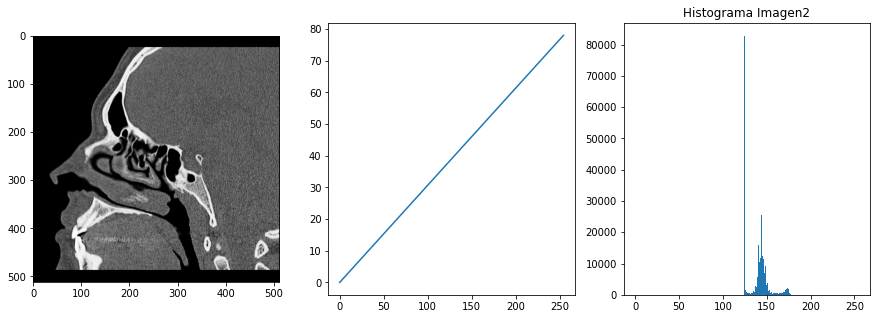

In [ ]:
imagen1 = cv2.imread('/content/drive/MyDrive/SIM2022Q2/señales/Imagenes/img25.png',0)

# Grafico
fig, axs = plt.subplots(1,3, figsize = (15,5))

axs[0].imshow(imagen1, cmap="gray")
plt.title('Imagen con contraste aumentado')
axs[1].plot(np.arange(255), np.linspace(0,np.amax(imagen1),255))
plt.title('Trasformación')

axs[2].hist(np.ravel(imagen2), bins=256, range=(0,255));
plt.title('Histograma Imagen2')




In [ ]:
import numpy as np
a = np.array([1,2,3,4,5,6,7,8,9])
idx = np.where((a>2) & (a<8) )
print(idx)

### Transformaciones por región

In [ ]:
umbral1 = 30
umbral2 = 60
G = 4
imagen2 = imagen1.copy()
idx1 = np.where((imagen2>umbral1) & (imagen2<umbral2))
imagen2[idx1] *= G

print(idx1)

x1 = np.arange(0,255)
y1 = x1[0:umbral1]
y2 = G+x1[umbral1:umbral2]
y3 = x1[umbral2:]

# Grafico
fig, axs = plt.subplots(1,3, figsize = (15,5))

axs[0].imshow(imagen2, cmap='gray', vmin=0, vmax=255)
plt.title('Imagen con contraste aumentado')
axs[1].plot(x1[0:umbral1], y1,'b')
axs[1].plot(x1[umbral1:umbral2],y2,'b')
axs[1].plot(x1[umbral2:],y3,'b')
plt.title('Transformación')

axs[2].hist(np.ravel(imagen2), bins=256, range=(0,255));
plt.title('Histograma Imagen2')


## Tipos de ruido

In [ ]:
import skimage as ski

imagen_SyP = cv2.imread('/content/drive/MyDrive/señales/Imagenes/img8.jpg',0)
imagen_Gauss = cv2.imread('/content/drive/MyDrive/señales/Imagenes/img9.jpg',0)
imagen_SyP = ski.util.random_noise(imagen_SyP, mode = 's&p', amount=0.3)

plt.figure(figsize=(10,25))
plt.subplot(121)
plt.imshow(imagen_SyP, cmap="gray")
plt.title('Ruido Sal y Pimienta')
plt.subplot(122)
plt.imshow(imagen_Gauss, cmap="gray")
plt.title('Ruido Gaussiano')
plt.show()

¿Cómo me doy cuenta que tipo de ruido es?

Extraigo una porción de la imagen y miro su histograma

In [ ]:
imagen_SyP_rec = imagen_SyP[700:800,400:500]
imagen_Gauss_rec = imagen_Gauss[300:400,400:500]

plt.figure(figsize=(10,25))
plt.subplot(121),plt.imshow(imagen_SyP_rec, cmap="gray"), plt.title('Ruido Sal y Pimienta')
plt.subplot(122),plt.imshow(imagen_Gauss_rec, cmap="gray"), plt.title('Ruido Gaussiano')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(121),plt.hist(np.ravel(255*imagen_SyP_rec),bins=256), plt.title('Histograma imagen con ruido SyP')
plt.subplot(122),plt.hist(np.ravel(imagen_Gauss_rec),bins=256), plt.title('Histograma imagen con ruido Gaussiano')
plt.show()

¿Cómo podemos filtrar estos ruidos?

## Filtros

### Convolución

![Convolución](https://textarchive.ru/images/1371/2741313/m229d2f93.png)

Máscara-  D    
Imagen- MxN     
Imagen_pad- M+(D-1)xN+(D-1) 

Qué kernels tengo que utilizar para eliminar estos ruidos?

*   Ruido Gaussiano: Filtro Promedio o filtro Gaussiano
*   Ruido SyP: Filtro de Mediana 



In [ ]:
kernel_FP = 1/25 * np.array(([1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1])) #kernel promedio

Cómo lo puedo generalizar para utilizar kernel 3x3 o 7x7?

In [ ]:
def GaussianKernel2D(nfil, ncol, sigmaf, sigmac):
    return(np.dot(cv2.getGaussianKernel(nfil, sigmaf), np.transpose(cv2.getGaussianKernel(ncol, sigmac))))

In [ ]:
print(cv2.getGaussianKernel(5,2))
np.dot(cv2.getGaussianKernel(5, 2), np.transpose(cv2.getGaussianKernel(5, 2)))

In [ ]:
kernel_FG = GaussianKernel2D(7,7,1,1)
kernel_FG #kernel Gaussiano

Aplicamos el filtro a la imagen que posee ruido Gaussiano

In [ ]:
#Usamos librería scipy para hacer convolución
import cv2
from scipy import signal
import matplotlib.pyplot as plt

imagen_Gauss = cv2.imread('/content/drive/MyDrive/señales/Imagenes/img9.jpg',0)

kernel_FG = GaussianKernel2D(7,7,1,1)
imagen_Gauss_FiltradaScipy = signal.convolve2d(imagen_Gauss, kernel_FG, mode='same')

plt.figure(figsize=(10,25))
plt.subplot(121),plt.imshow(imagen_Gauss, cmap="gray", vmin=0, vmax=255), 
plt.title('Imagen con ruido Gaussiano')
plt.subplot(122),plt.imshow(imagen_Gauss_FiltradaScipy, cmap="gray", vmin=0, vmax=255), 
plt.title('Imagen Filtrada con kernel promedio')
plt.show()

In [ ]:
# Usamos un kernel promediador
import numpy as np
import scipy.signal as sig

a = 7
Kernel_prom = np.ones((a,a)) / a

imagen_Gauss_Filt_Prom = sig.convolve2d(imagen_Gauss, Kernel_prom, mode='same')

plt.figure(figsize=(10,25))
plt.subplot(121),plt.imshow(imagen_Gauss, cmap="gray", vmin=0, vmax=255), 
plt.title('Imagen con ruido Gaussiano')
plt.subplot(122),plt.imshow(imagen_Gauss_Filt_Prom, cmap="gray", vmin=0, vmax=255), 
plt.title('Imagen Filtrada con kernel promedio')


In [ ]:
#Usamos librería cv2
imagen_Gauss_Filtrada =cv2.filter2D(imagen_Gauss,-1,kernel_FG) #ddepth=-1 misma profundidad que la imagen original  

plt.figure(figsize=(10,25))
plt.subplot(121),plt.imshow(imagen_Gauss, cmap="gray", vmin=0, vmax=255), plt.title('Imagen con ruido Gaussiano')
plt.subplot(122),plt.imshow(imagen_Gauss_Filtrada, cmap="gray", vmin=0, vmax=255), plt.title('Imagen Filtrada con kernel Gaussiano')
plt.show()

Aplicamos el filtro a la imagen que posee ruido Sal y Pimienta

In [ ]:
import cv2
from scipy import signal
import matplotlib.pyplot as plt

imagen_SyP = cv2.imread('/content/drive/MyDrive/señales/Imagenes/img8.jpg',0)

imagen_SyP = ski.util.random_noise(imagen_SyP,mode='s&p', amount=0.5)

n=3 #Máscara 3x3
imagen_SyP_Filtrada =cv2.medianBlur(imagen_SyP,n) 

plt.figure(figsize=(10,25))
plt.subplot(121),plt.imshow(imagen_SyP, cmap="gray", vmin=0, vmax=255), plt.title('Imagen con ruido Sal y Pimienta')
plt.subplot(122),plt.imshow(imagen_SyP_Filtrada, cmap="gray", vmin=0, vmax=255), plt.title('Imagen Filtrada con Filtro de Mediana')
plt.show()

Qué pasa si filtro imagen con ruido SyP con Filtro de Gauss?

In [ ]:
kernel_FG = GaussianKernel2D(7,7,1,1)
imagen_SyP_Filt =cv2.filter2D(imagen_SyP,-1,kernel_FG) #ddepth=-1 misma profundidad que la imagen original  

plt.figure(figsize=(10,25))
plt.subplot(121),plt.imshow(imagen_SyP, cmap="gray", vmin=0, vmax=255), 
plt.title('Imagen con ruido Gaussiano')
plt.subplot(122),plt.imshow(imagen_SyP_Filt, cmap="gray", vmin=0, vmax=255), 
plt.title('Imagen Filtrada con kernel Gaussiano')
plt.show()

Qué pasa si filtro imagen con ruido Gaussiano con Filtro de Mediana?

In [ ]:
imagen_Gauss_Filtrada3 =cv2.medianBlur(imagen_Gauss,3)   

plt.figure(figsize=(10,25))
plt.subplot(121),plt.imshow(imagen_Gauss, cmap="gray", vmin=0, vmax=255), plt.title('Imagen con ruido Gaussiano')
plt.subplot(122),plt.imshow(imagen_Gauss_Filtrada3, cmap="gray", vmin=0, vmax=255), plt.title('Imagen Filtrada con Filtro de Mediana')
plt.show()